## Шаг 1.	Устанавливаем библиотеки ##

In [ ]:
!pip install -U pyFTS #наша главная библиотека - для работы с нечеткими временными рядами
!pip3 install openpyxl #для работы с xls
!pip3 install matplotlib #для рисовани графиков
!pip3 install scipy #математика
!pip3 install numpy #математика
!pip3 install pandas #для работы с таблицами

Подключаем библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

## Шаг 2. Загружаем данные (1 балл)

Загрузите файл xlsx c помощью read_excel (pandas) и прочитайте его начало с помощью функции .head() в pandas.

*Получите значение столбца popData2019 для 0 строки.*

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


## Шаг 3. Делаем сводную таблицу (5 балла) ##
Требуется выделить необходимые столбцы из основной таблицы и вывести сводную таблицу по континентам. 
В Pandas есть функция DataFrame.pivot_table(), которая позволяет быстро преобразовать DataFrame в сводную таблицу.

*Выполните continents.to_csv('cont.csv') и вставьте содержимое файла cont.csv в поле ниже (файл находится там же, где и Ваш файл Jupyter Notebook). Чтобы скопировать содержимое файла, откройте файл, например, Блокнотом (но не экселем).*

In [4]:
#df - исходные данные
#values - столбцы для агрегирования
#index - ключи для группировки по индексу
#columns - ключи для группировки сталбцов

continentExp = pd.pivot_table(df, values='cases', index=['dateRep'],columns=['continentExp'], aggfunc=np.sum, fill_value=0)
continentExp.to_csv('cont.csv')

data = continentExp
print(data)

continentExp  Africa  America   Asia  Europe  Oceania  Other
dateRep                                                     
2019-12-31         0        0     27       0        0      0
2020-01-01         0        0      0       0        0      0
2020-01-02         0        0      0       0        0      0
2020-01-03         0        0     17       0        0      0
2020-01-04         0        0      0       0        0      0
...              ...      ...    ...     ...      ...    ...
2020-12-10     18892   325238  76203  255762       19      0
2020-12-11     19111   325486  75131  273397      227      0
2020-12-12     18909   339515  71851  226696      169      0
2020-12-13     18517   304854  72723  230310       17      0
2020-12-14     16142   250922  64995  208571       29      0

[350 rows x 6 columns]


Теперь из сводной таблице по континентам выберете только Европу (к continents можно обращаться как массиву).
В переменную data запишите только число заболевших (без дат).

Дополнительно: построить график заболевших спомощью функции plot(), применненой к данным по Европе.

<AxesSubplot:xlabel='dateRep'>

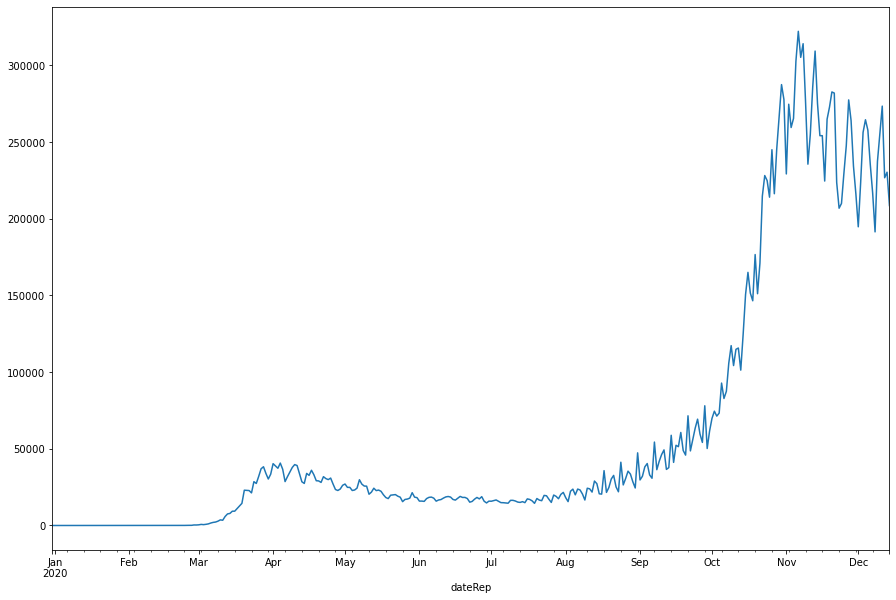

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,10])
data["Europe"].plot()

In [7]:
data = data["Europe"].values
print(data)

[     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      3      0      0      1      4
      2      5      7      1      1      3      2      0      2      6
      0      5      1      2      1      0      0      0      1      0
      0      0      0     14     63     53     98    109    107    341
    322    429    708    558    760   1037   1597   2015   2242   2807
   3651   3424   5886   7543   7862   9305   9329  10997  12770  14435
  23002  22886  22779  21248  28564  27406  32026  36988  38291  33963
  30321  33442  40316  38822  37312  40688  36680  28620  31867  34907
  37834  39692  39106  33841  28497  27419  33960  32683  35998  33108
  29189  29056  28079  31823  30582  29910  30912  27034  23455  22814
  23776  26212  27027  24853  24861  22819  23133  24367  29824  26976
  25722  25636  20374  21750  24299  22755  23083  22296  20033  18242
  1753

## Шаг 4. Определение термов (1 балла)
Разобъем универсальное множество на интервалы с помощью GridPartitioner.

 *Возьмите параметр npart = 10 и выведите fs.*

Дополнителньно: постройте функцию принадлежности.


Grid:
A0: trimf([-35438.37, 0.0, 35438.37])
A1: trimf([0.0, 35438.37, 70876.74])
A2: trimf([35438.37, 70876.74, 106315.11000000002])
A3: trimf([70876.74000000002, 106315.11000000002, 141753.48])
A4: trimf([106315.11000000002, 141753.48, 177191.85])
A5: trimf([141753.48, 177191.85, 212630.22])
A6: trimf([177191.85000000003, 212630.22000000003, 248068.59000000003])
A7: trimf([212630.22000000003, 248068.59000000003, 283506.96])
A8: trimf([248068.59000000003, 283506.96, 318945.33])
A9: trimf([283506.96, 318945.33, 354383.7])



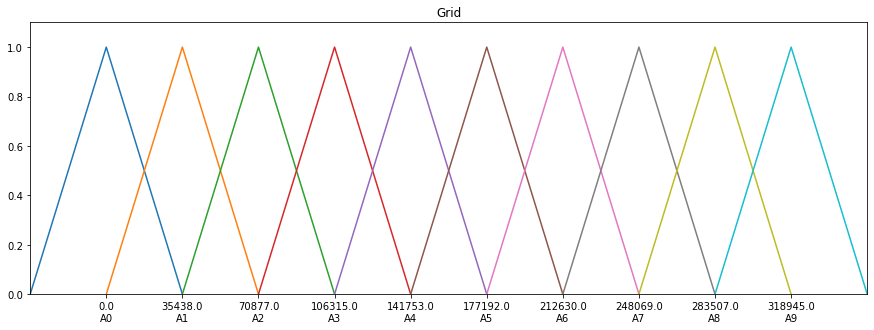

In [9]:
from pyFTS.partitioners import Grid

#Вместо foo напишите истинные значения
fs = Grid.GridPartitioner(data=data,npart=10)

#Нарисуем график функций принадлжености
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
fs.plot(ax)
print(fs)

## Шаг 5. Фаззификация (1 балл)
Сделать фаззификацию: установить каждой записи нечеткое множество методом максимизации.
Запишите значения в переменную fuzzyfied.

*Возьмите параметр npart = 10 как в предыдущем степе. Выведите fuzzyfied.*

In [10]:
#Метод из библиотеки pyFTS: fuzzyfy(data, method='maximum', mode='sets')

fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')
print(fuzzyfied)

['A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A0', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A0', 'A1', 'A1', 'A1', 'A1', 'A1', 'A0', 'A0', 'A0', 'A1', 'A1', 'A1', 'A1', 'A0', 'A0', 'A0', 'A0', 'A1', 'A1', 'A1', 'A0', 'A0', 'A0', 'A1', 'A1', 'A1', 'A1

## Шаг 6. Генерация правил (1 балл)
Вывести правила. 

Модель должна содержать правило для каждого отдельного найденного прецедента, и следствием каждого правила будет объединение всех следствий каждой временной модели с одним и тем же прецедентом.

* chen.ConventionalFTS(partitioner=): создает пустую модель, используя метод Chen(1996) *
* FTS.fit (data, partitioner=): обучающая модель на основе данных обучения по данным параметрам и термам*

*Получите правила и выведите их. npart = 10*

In [11]:
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)
print(model)

Conventional FTS:
A0 -> A0,A1
A1 -> A0,A1,A2
A2 -> A1,A2,A3
A3 -> A2,A3,A4
A4 -> A4,A5
A5 -> A4,A6,A7
A6 -> A5,A6,A7,A8
A7 -> A6,A7,A8,A9
A8 -> A6,A7,A8,A9
A9 -> A8,A9



In [12]:
fuzzyfied = fs.fuzzyfy(18876, method='maximum', mode='sets')
print(fuzzyfied)

A1


## Шаг 7. Предсказываем (1 балл)
С помощью метода model.predict попробуйте предсказать следующее значение по заданной точке.

*Заданная точка - 230310.*

In [13]:
model.predict([230310])

[230349.40500000003]

Дополнительно: постройте два графика с помощью функции plot(): с исходными данными и прогнозируемыми.

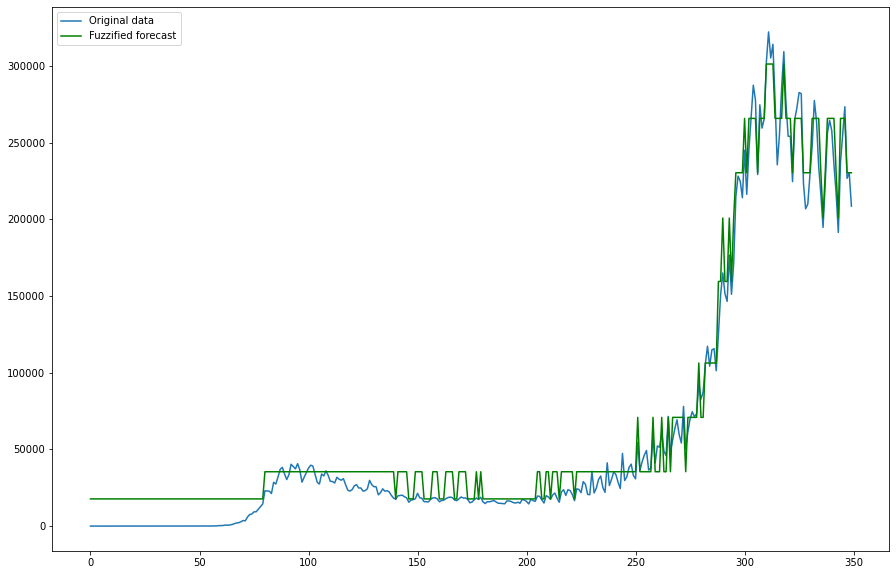

In [16]:
from matplotlib.pyplot import *
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,10])

#Строим график
orig, = plot(data, label="Original data")
pred, = plot(forecasts, label="Fuzzified forecast", color ='g')
legend(handles=[orig, pred])

In [14]:
forecasts = model.predict(data)
print(forecasts)

[17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 17719.185, 35438.37, 35438.37, 35438.37, 35438.37, 35438.37, 35438.37, 35438.37, 35438.37, 35438.37, 35438.37, 35438.37, 35438.37,

In [15]:
print(data)

[     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      3      0      0      1      4
      2      5      7      1      1      3      2      0      2      6
      0      5      1      2      1      0      0      0      1      0
      0      0      0     14     63     53     98    109    107    341
    322    429    708    558    760   1037   1597   2015   2242   2807
   3651   3424   5886   7543   7862   9305   9329  10997  12770  14435
  23002  22886  22779  21248  28564  27406  32026  36988  38291  33963
  30321  33442  40316  38822  37312  40688  36680  28620  31867  34907
  37834  39692  39106  33841  28497  27419  33960  32683  35998  33108
  29189  29056  28079  31823  30582  29910  30912  27034  23455  22814
  23776  26212  27027  24853  24861  22819  23133  24367  29824  26976
  25722  25636  20374  21750  24299  22755  23083  22296  20033  18242
  1753